# Fourier transform

In [94]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

pi = math.pi

In [95]:
#Given that time points = 1024,  sampling_rate = 1024
pnts = 1024
srate = 1024
t = np.arange(0, pnts)/srate

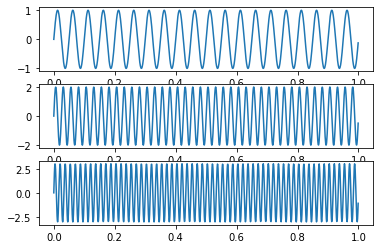

In [96]:
#creating 3 different sine waves
frex = [20, 40, 60]
amp = [1, 2, 3]

sine1 = amp[0] * np.sin(2*pi*frex[0]*t)
sine2 = amp[1] * np.sin(2*pi*frex[1]*t)
sine3 = amp[2] * np.sin(2*pi*frex[2]*t)

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(t, sine1)

ax2 = fig.add_subplot(312)
ax2.plot(t, sine2)

ax3 = fig.add_subplot(313)
ax3.plot(t, sine3)

Text(0, 0.5, 'Amplitude')

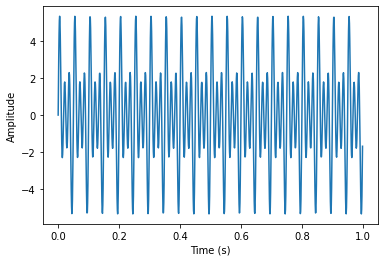

In [97]:
#then, add them together
signal = sine1 + sine2 + sine3

#signal = 10 * np.sin(2*pi*20*t)

plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')

In [98]:
FourierCoefs = fft(signal) / pnts

Amplitude = 2 * np.abs(FourierCoefs)
frequencies = np.linspace(0, srate/2, math.floor(pnts/2)+1)

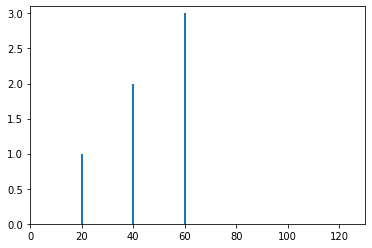

In [99]:
plt.bar(frequencies, Amplitude[:frequencies.shape[0]])
plt.xlim([0, 130])
plt.ylim([0, 3.1])
plt.xlabel('Frequency (s)')
plt.ylabel('Amplitude (μV)')

plt.show()

# Effect of zero-padding

Text(0, 0.5, 'Amplitude (μV)')

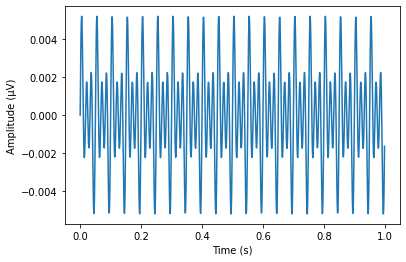

In [104]:
recon_signal = ifft(FourierCoefs)
plt.plot(t, np.real(recon_signal))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')

Text(0, 0.5, 'Amplitude (μV)')

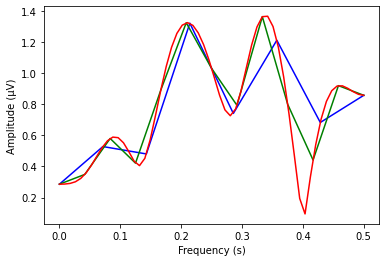

In [111]:
#zero_padding
signal_2 = [1, 0, 1, 2, -3, 1, 2, 0, -3, 0, -1, 2, 1, -1]


signalX1 = fft(signal_2)                    / len(signal_2)
signalX2 = fft(signal_2, len(signal_2)+10)  / len(signal_2)
signalX3 = fft(signal_2, len(signal_2)+100) / len(signal_2)

freq1 = np.linspace(0, 0.5, math.floor(len(signalX1)/2)+1)
freq2 = np.linspace(0, 0.5, math.floor(len(signalX2)/2)+1)
freq3 = np.linspace(0, 0.5, math.floor(len(signalX3)/2)+1)

plt.plot(freq1, 2 * np.abs( signalX1[:len(freq1)] ), color='blue')
plt.plot(freq2, 2 * np.abs( signalX2[:len(freq2)] ), color='green')
plt.plot(freq3, 2 * np.abs( signalX3[:len(freq3)] ), color='red')
plt.xlabel('Frequency (s)')
plt.ylabel('Amplitude (μV)')

# Weich's method

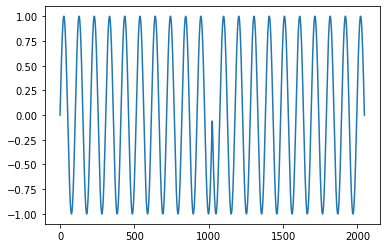

In [133]:
from scipy import signal

# First, let's create a non-stationary signal
y = np.sin(2*pi*10*t)
y_ = y[::-1]

non_stat_signal = np.concatenate([y, y_],axis=0)
plt.plot(non_stat_signal)

Text(0, 0.5, 'Amplitude (μV)')

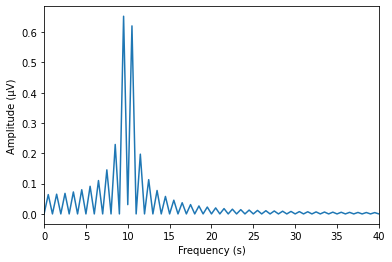

In [145]:
#Then, apply usual FFT... the result is very strange...
freqs = np.linspace(0, srate/2, math.floor(len(non_stat_signal)/2+1))
fc = 2 * abs(fft(non_stat_signal)) / len(non_stat_signal)

plt.plot(freqs, fc[:len(freqs)])
plt.xlim([0, 40])
plt.xlabel('Frequency (s)')
plt.ylabel('Amplitude (μV)')


Text(0, 0.5, 'Amplitude (μV)')

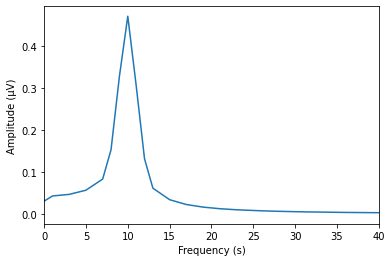

In [155]:
# Finally, Welch's method: y axis is Power
# Although better than usual FFT, note that the amplitude scaling is still not perfect. 
freq, pxx = signal.welch(non_stat_signal, srate, nperseg=len(non_stat_signal)/2)
plt.plot(freq, np.sqrt(pxx))
plt.xlim([0, 40])
plt.xlabel('Frequency (s)')
plt.ylabel('Amplitude (μV)')